# 📝 Linear Regression Exercise

## 🧩 Ques 1: Given X = [1,2,3,4,5] and Y = [3,4,2,5,6], compute slope (m) and intercept (b).

In [1]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([3,4,2,5,6])

x_mean = x.mean()
y_mean = y.mean()

num = ((x - x_mean) * (y - y_mean)).sum()
den = ((x - x_mean) ** 2).sum()

m = num / den
b = y_mean - m * x_mean

print("Slope : ", m)
print("Intercept :", b)

"""
Output:
 Slope :  0.7
 Intercept : 1.9000000000000004
"""

Slope :  0.7
Intercept : 1.9000000000000004


'\nOutput:\n Slope :  0.7\n Intercept : 1.9000000000000004\n'

---
## 🧩 Ques 2: Using the values of m and b from Question 1, predict Y when X = 10.

In [2]:
# Prediction
y_pred = m* 10 + b
print(y_pred) # 8.9

8.9


---
## 🧩 Ques 3: Plot the scatter plot and regression line using matplotlib.

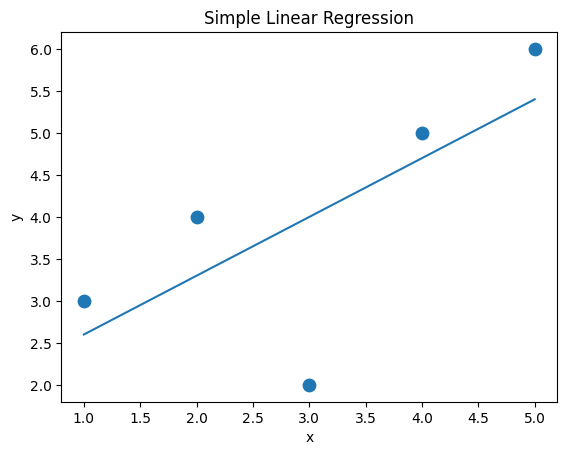

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x, y, s=80)
plt.plot(x, m*x + b)

plt.xlabel('x')
plt.ylabel('y')
plt.title("Simple Linear Regression")
plt.show()


---
## 🧩 Ques 4: Calculate R^2 score manually (without sklearn) for data in Q1.

In [6]:
y_hat = m*x + b

sumOfSquare_total = ((y - y.mean())**2).sum()
sumOfSquare_result = ((y - y_hat)**2).sum()

r2 = 1 - (sumOfSquare_result / sumOfSquare_total)
print(r2) # 0.4900000000000001


0.4900000000000001


---
## 🧩 Ques 5: Train a simple linear regression model using sklearn.LinearRegression and compare the slope/intercept with your manual values.

In [8]:
# sklearn Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1,1), y)

print("Sklearn Slope:", model.coef_[0]) # Sklearn Slope: 0.6999999999999998
print("Sklearn Intercept:", model.intercept_) # Sklearn Intercept: 1.9000000000000004



Sklearn Slope: 0.6999999999999998
Sklearn Intercept: 1.9000000000000004


---
## 🧩 Ques 6: Train a simple linear regression model using sklearn.LinearRegression and compare the slope/intercept with your manual values.

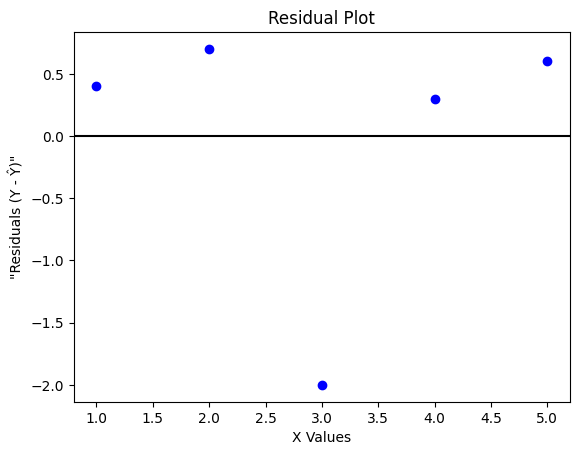

In [12]:
residuals = y - y_hat

plt.scatter(x, residuals, color='blue', label='Residual Points')
plt.axhline(0, color='black', label='Zero Residual Line')

plt.xlabel('X Values')
plt.ylabel('"Residuals (Y - Ŷ)"')
plt.title("Residual Plot")
plt.show()


---
## 🧩 Ques 7: Calculate Mean Squared Error (MSE) and Root MSE (RMSE) manually for the model in Q1.

In [15]:
mse = ((y - y_hat)**2).mean()
rmse = np.sqrt(mse)

print(mse) # 1.0099504938362076
print(rmse) # 1.0099504938362076


1.0199999999999998
1.0099504938362076


---
## 🧩 Ques 8: Use the dataset below to train a Multiple Linear Regression model:

| Exp | TestScore | Projects | Salary |
|-----|-----------|----------|--------|
| 1   | 80        | 1        | 20     |
| 2   | 82        | 2        | 22     |
| 3   | 85        | 2        | 24     |
| 4   | 90        | 3        | 28     |
| 5   | 94        | 3        | 32     |

Build a model to predict Salary.


In [19]:
X = np.array([[1,80,1],[2,82,2],[3,85,2],[4,90,3],[5,94,3]])
Y = np.array([20,22,24,28,32])

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

print("Coefficients:", model.coef_) # Coefficients: [-0.08695652  0.86956522 -0.08695652]
print("Intercept:", model.intercept_) # Intercept: -49.30434782608691


Coefficients: [-0.08695652  0.86956522 -0.08695652]
Intercept: -49.30434782608691


---
## 🧩 Ques 9: Predict Salary for: Exp = 6, TestScore = 96, Projects = 4.

In [21]:
model.predict([[6,96,4]])[0] # np.float64(33.30434782608695)

np.float64(33.30434782608695)

---
## 🧩 Ques 10: Perform 80-20 Train–Test split and compute R² on test set.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

model.score(X_test, Y_test) 


0.9810650887573966

---
## 🧩 Ques 11: Standardize features using StandardScaler and retrain the model. Print new coefficients.

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, Y)

print(model.coef_) # [-0.12297509  4.48142564 -0.0650723 ]

[-0.12297509  4.48142564 -0.0650723 ]


---
## 🧩 Ques 12: Plot Predicted vs Actual Salary values after training.

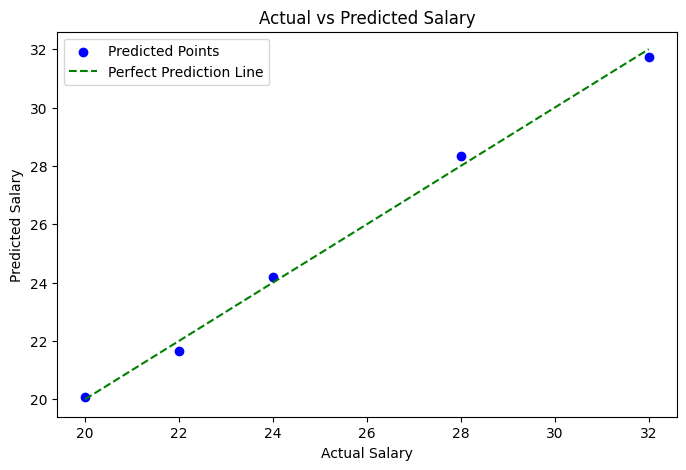

In [32]:
Y_pred = model.predict(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(Y, Y_pred, color='blue', label='Predicted Points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linestyle='--', label='Perfect Prediction Line')

plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.show()


---
## 🧩 Ques 13: Calculate MAE, MSE, RMSE for model from Q8 using sklearn metrics.

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(Y, Y_pred)
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)

# mae, mse, rmse
print(mae) # 0.2434782608695663
print(mse) # 0.06956521739130435
print(rmse) # 0.2637521893583148


0.2434782608695663
0.06956521739130435
0.2637521893583148


---
## 🧩 Ques 14: Manually calculate Adjusted R² for the multiple regression model.

In [38]:
n = len(Y)
p = X.shape[1]
r2 = model.score(X_scaled, Y)

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(adj_r2) # 0.9850074962518742


0.9850074962518742


---
## 🧩 Ques 15: Create Polynomial Features (degree=2) and fit a Polynomial Regression model. Compare R² with linear model.

Slope: 0.7
Intercept: 1.9000000000000004


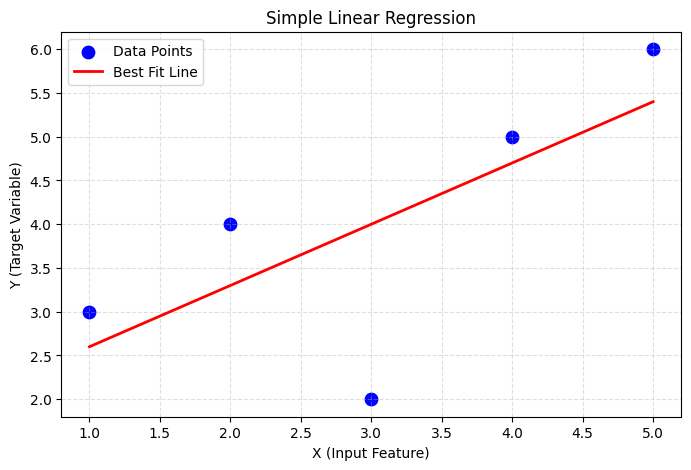

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
x = np.array([1,2,3,4,5])
y = np.array([3,4,2,5,6])

x_mean = x.mean()
y_mean = y.mean()

numerator = ((x - x_mean) * (y - y_mean)).sum()
denominator = ((x - x_mean)**2).sum()

m = numerator / denominator
b = y_mean - m * x_mean

print("Slope:", m)
print("Intercept:", b)


plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=80, color='blue', label='Data Points')
plt.plot(x, m*x + b, color='red', linewidth=2, label='Best Fit Line')

plt.xlabel('X (Input Feature)')
plt.ylabel('Y (Target Variable)')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

---
## 🧩 Ques 16: Explain the difference between:
- Underfitting
- Overfitting \
in the context of linear regression.

### Underfitting vs Overfitting

- Underfitting → model too simple → low R², large error
- Overfitting → model too complex → high training R², poor test performance

---
## 🧩 Ques 17: Given a dataset where values increase non-linearly, explain why linear regression performs poorly.

### Non-linear data
- Linear regression fails → needs polynomial regression or non-linear models

---

### Thank you 😊🙏
---